<a href="https://colab.research.google.com/github/ayushi-solani/internship/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Price Prediction Using Multiple Linear Regression**

# **Objective**

Predict the median value of houses (MEDV) based on various features like number of rooms, age, distance to employment centers, etc.

Understand the relationship between different housing attributes and their effect on house prices.

Evaluate model performance using metrics like MAE, MSE, and MAPE.

DATA SOURCE:'https://github.com/YBIFoundation/Dataset/raw/main/Boston.csv'
      (Contains 506 rows and 14 columns)

In [ ]:
# Step 1 : import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
# Step 2 : import data
house = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Boston.csv')

In [ ]:
house.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
house.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
house.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
# Step 3 : define target (y) and features (X)

In [ ]:
y = house['MEDV']

In [ ]:
X = house.drop(['MEDV'],axis=1)

In [ ]:
# Step 4 : train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=2529)

In [ ]:
# check shape of train and test sample
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [ ]:
# Step 5 : select model
model = LinearRegression()

In [ ]:
# Step 6 : train model
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.intercept_

np.float64(34.21916368862993)

In [ ]:
model.coef_

array([-1.29412069e-01,  3.65184937e-02,  1.54418944e-02,  2.35486887e+00,
       -2.04171489e+01,  4.41356565e+00,  4.61075512e-03, -1.58626723e+00,
        2.51478665e-01, -9.59591213e-03, -9.64169204e-01,  1.00972679e-02,
       -5.43198745e-01])

In [ ]:
# Step 7 : predict model
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([31.71733828, 22.02143302, 21.16613197, 39.77837246, 20.10258512,
       22.86056216, 18.35574643, 14.7902735 , 22.55778646, 21.34594953,
       18.38491085, 27.9664665 , 29.85929012,  6.44680773, 10.68297311,
       26.24809521, 21.89368671, 25.22692365,  3.62385942, 36.21920372,
       24.07812335, 22.94103934, 14.27095261, 20.79013279, 24.22725035,
       16.7379611 , 18.74856986, 20.96709658, 28.513571  , 20.86346628,
        9.23450577, 17.06754852, 22.06953886, 22.23121875, 39.25875323,
       26.16769924, 42.50354003, 19.34517962, 34.51869058, 14.07023676,
       13.81055358, 23.27727535, 11.79100403,  9.01040731, 21.64587594,
       25.55339317, 18.16941728, 16.81991401, 14.66170215, 14.86477172,
       33.78924259, 33.26959074, 15.49208778, 24.08269034, 27.63531226,
       19.58288727, 45.02488529, 20.96959671, 20.07202649, 27.67146866,
       34.59154418, 12.71353064, 23.66247812, 31.65792337, 28.97459925,
       32.45963484, 13.93494747, 35.491924  , 19.35871482, 19.60

In [ ]:
# Step 8 : model accuracy

In [ ]:
mean_absolute_error(y_test,y_pred) #average error

3.155030927602485

In [ ]:
mean_absolute_percentage_error(y_test,y_pred) #average percentage error

0.1635593588221789

In [ ]:
mean_squared_error(y_test,y_pred) #penalizes larger errors

20.718012877838433

In [ ]:
# Step 9 : Data Visualization

# **Scatter plot of Actual vs Predicted**
Blue dots = predicted vs actual values.

Red line = perfect prediction (y = x).

The closer the points are to the red line → better the model.

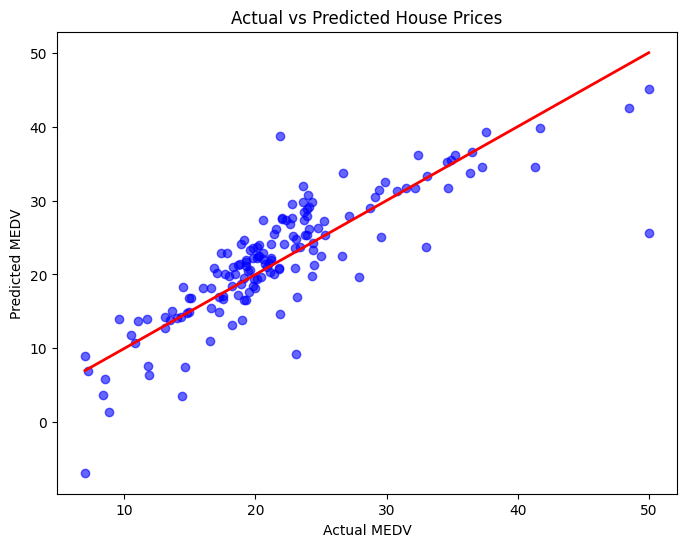

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Perfect prediction line
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted House Prices')
plt.show()

# **Residual Plot**

Residual = Actual - Predicted.

Helps check if errors are randomly distributed.

A good model should have residuals scattered randomly around 0.

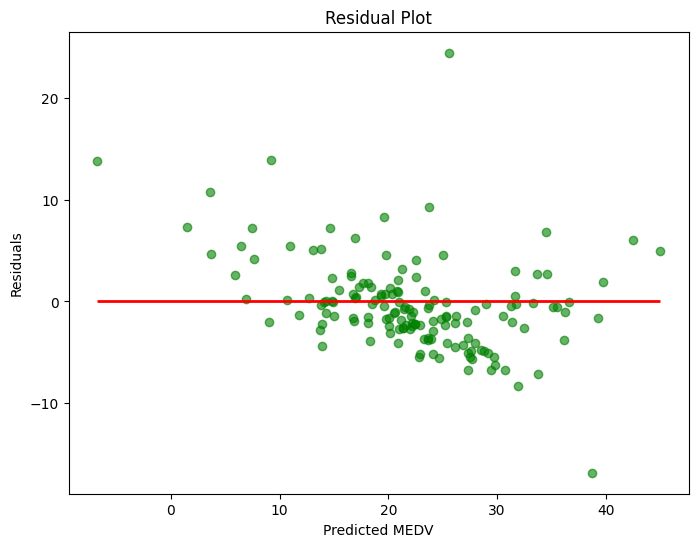

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, color='green', alpha=0.6)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), color='red', linewidth=2)
plt.xlabel('Predicted MEDV')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# **Explaination**

Predicted house prices using features like number of rooms (RM), crime rate (CRIM), property tax (TAX), and accessibility to highways (RAD).

The model learned from past data and predicted prices close to actual values.

**Examples:**

Houses with more rooms or better access to highways had higher prices.

Houses in areas with higher crime or higher tax rates had lower prices.

Overall, the model helps estimate house prices based on important factors

**Process:**

Split data into training (70%) and testing (30%) sets.

Trained the linear regression model on training data.

Predicted house prices on test data.

**Evaluation:**

MAE: 3.15 → average error

MAPE: 16% → average percentage error

MSE: 20.72 → penalizes larger errors

**Visualization:**

Scatter plot: Shows predicted vs actual prices.

Residual plot: Confirms errors are randomly distributed.